<a href="https://colab.research.google.com/github/MariannaBr/Women-cycles-and-trainings/blob/master/menstrual_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Authenticate google drive access and mount it to /content/drive path.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Check the contents of the Data/ directory.
import glob
DATA_PATH_PREFIX = '/content/drive/My Drive/Colab Notebooks/Data'
def get_data_file(file_name):
  return DATA_PATH_PREFIX+'/'+file_name 
glob.glob(DATA_PATH_PREFIX + '/*')

#**Menstrual data**

In [0]:
menstrual_cycles = pd.read_json(get_data_file('81041029_MenstrualCycles.json'), orient='records')

In [0]:
menstrual = menstrual_cycles[['actualCycleLength', 'startDate']]
menstrual = menstrual.rename(columns={'actualCycleLength': 'CycleLength'})
menstrual = menstrual.append([{'startDate':'2020-05-11'}], ignore_index=True)
menstrual['startDate'] = pd.to_datetime(menstrual.startDate)

for i in range(1,len(menstrual.startDate)):
  menstrual.loc[i-1,'CycleLength'] = menstrual.loc[i, 'startDate'] - menstrual.loc[i-1, 'startDate']

menstrual['Ovulation'] = menstrual['startDate'] + (menstrual.CycleLength // 2)
mp = menstrual.iloc[:-1, :]
mp

#**Resting heart rate**

In [0]:
prefix = '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR'
def get_file(file_name):
  return prefix + '/' + file_name
glob.glob(prefix + '/*')

In [0]:
i = 0
HR = []
for file in glob.glob(prefix+'/*'):
  HR.append(pd.read_csv(get_file('HR_'+str(i)+'.csv'), skiprows=[1]))
  i += 1

day_delta = datetime.timedelta(days=1)
start_date = datetime.date(2019, 12, 4)
weeks = []
for i in range(len(HR)):
  week = []
  end_date = start_date + 7*day_delta
  for j in range((end_date-start_date).days):
    week.append(start_date + j*day_delta)
  weeks.append(week)
  start_date = end_date

for i in range(len(HR)):
  HR[i]['Date'] = weeks[i]

resting_HR = pd.concat(HR)
resting_HR = resting_HR.reset_index()
resting_HR = resting_HR[['Resting Heart Rate', 'Date']]
resting_HR = resting_HR.rename(columns={'Resting Heart Rate':'HR'})
resting_HR['Resting_HR'] = resting_HR.rolling(window=10, min_periods=1).mean()
resting_HR['Date'] = pd.to_datetime(resting_HR.Date)
resting_HR

#**Graph - Cycle-HR**

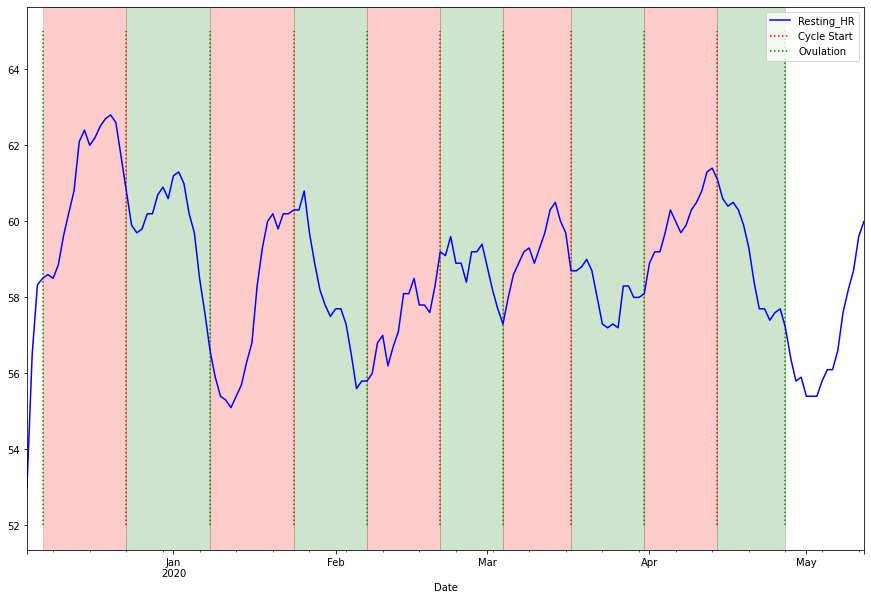

In [247]:
ax = plt.gca()
resting_HR.plot(x='Date', y='Resting_HR', ax=ax, figsize=(15,10), color='blue')

ax.vlines(x=mp.iloc[0]['startDate'], ymin=52, ymax=65, color='red', linestyles='dotted', label='Cycle Start')
ax.vlines(x=mp.iloc[0]['Ovulation'], ymin=52, ymax=65, color='green', linestyles='dotted', label='Ovulation')
ax.legend()
for i in range(1,len(mp['startDate'])):
  ax.vlines(x=mp.iloc[i]['startDate'], ymin=52, ymax=65, color='red', linestyles='dotted')
  ax.vlines(x=mp.iloc[i]['Ovulation'], ymin=52, ymax=65, color='green', linestyles='dotted')
  ax.axvspan(mp.iloc[i-1]['Ovulation'], mp.iloc[i]['startDate'], alpha=0.2, color='red')
  ax.axvspan(mp.iloc[i]['startDate'], mp.iloc[i]['Ovulation'], alpha=0.2, color='green')